In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
ruta = "C:/Users/dario/OneDrive/Escritorio/Unab/Inferencia y Patrones/Richter.csv"
df = pd.read_csv(ruta)
df.head()

,Amplitud,Escala
0,1.000000,5.554739
1,1.246231,5.333507
2,1.492462,6.226567
3,1.738693,6.528579
4,1.984925,5.760120


In [3]:
Amplitud = df["Amplitud"]

In [4]:
Escala = df["Escala"]

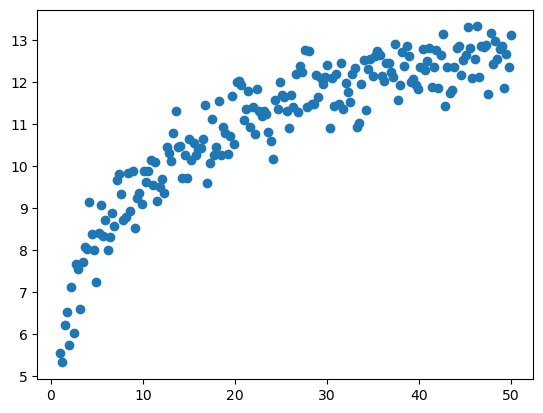

In [5]:
plt.scatter(Amplitud, Escala)

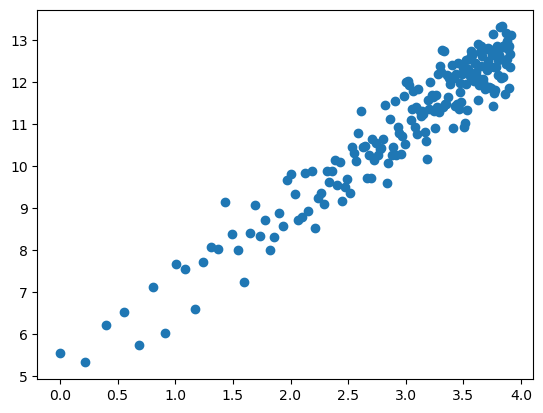

In [6]:
plt.scatter(np.log(Amplitud), Escala)

In [7]:
X = pd.DataFrame(np.log(Amplitud))
X.head()

,Amplitud
0,0.000000
1,0.220124
2,0.400427
3,0.553134
4,0.685581


In [8]:
y = pd.DataFrame(Escala)
y.head()

,Escala
0,5.554739
1,5.333507
2,6.226567
3,6.528579
4,5.760120


In [9]:
modelo = linear_model.LinearRegression()

In [10]:
modelo.fit(X,y)

LinearRegression()

In [11]:
modelo.predict([[np.log(50)]]) #Dio 12.78871312

C:\Users\dario\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[12.78871312]])

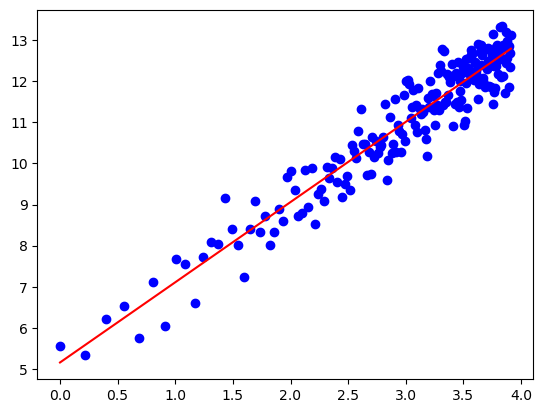

In [12]:
plt.scatter(X,y, c='blue')
plt.plot(X, modelo.predict(X), c='red')

In [13]:
Y_residuo = modelo.predict(X) 

In [14]:
residuo = y - Y_residuo

In [15]:
residuo.iloc[49] # Dio -0.044049. Uso el 49 porque en python los indices empiezan en 0

Escala   -0.044049
Name: 49, dtype: float64

En Python, como no es especializado en estadistica, necesitamos incorporar una nueva biblioteca. De esa manera conseguimos los p.valores y un resumen completo como en r al aplicar summary

In [42]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Dentro de Python

Comparación:                    sklearn             vs  statsmodels
Característica	          sklearn.LinearRegression	   statsmodels.OLS
Coeficientes	                   ✅ .coef_	           ✅ .params
Intercepto	                       ✅ .intercept_	       ✅ incluido (si usás add_constant)
R²	                               ✅ .score(X, y)	       ✅ .rsquared
p-valores	                       ❌ No	               ✅ .pvalues
Errores estándar	               ❌ No	               ✅ .bse
Resumen completo	               ❌ No	               ✅ .summary()
                                PREDECIR               INTERPRETAR

In [16]:
import statsmodels.api as sm

# Supongamos que ya tenés los datos transformados
X = np.log(df["Amplitud"])
y = df["Escala"]

# Agregar constante (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Mostrar resumen
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Escala   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2166.
Date:                Thu, 04 Sep 2025   Prob (F-statistic):          1.44e-108
Time:                        10:00:41   Log-Likelihood:                -142.91
No. Observations:                 200   AIC:                             289.8
Df Residuals:                     198   BIC:                             296.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1596      0.130     39.690      0.0

In [17]:
#Buscamos intervalo de confianza del 0.95
modelo.conf_int(alpha = 0.05)

,0,1
const,4.903270,5.415981
Amplitud,1.867523,2.032805


El int de confianza nos dice para este caso que para encontrar una escala que este entre 4.90 y 5.41, 
debemos tener a su vez una amplitud de entre 1.86 y 2.03 (esta seria la pendiente)
